In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows' , 60)

In [3]:
df = pd.read_csv('municipality_bus_utilization.csv')
df.head(10)

,timestamp,municipality_id,usage,total_capacity
0,2017-06-04 07:59:42,9,454,1332
1,2017-06-04 07:59:42,8,556,2947
2,2017-06-04 07:59:42,4,1090,3893
3,2017-06-04 07:59:42,0,204,2813
4,2017-06-04 07:59:42,7,718,2019
5,2017-06-04 07:59:42,5,70,587
6,2017-06-04 07:59:42,2,273,697
7,2017-06-04 07:59:42,1,129,397
8,2017-06-04 07:59:42,6,597,3113
9,2017-06-04 07:59:42,3,623,1930


In [4]:
df.tail(10)

,timestamp,municipality_id,usage,total_capacity
13060,2017-08-19 16:30:35,4,2542,3893
13061,2017-08-19 16:30:35,1,396,397
13062,2017-08-19 16:30:35,0,1271,2813
13063,2017-08-19 16:30:35,9,815,1332
13064,2017-08-19 16:30:35,5,202,587
13065,2017-08-19 16:30:35,2,548,697
13066,2017-08-19 16:30:35,8,1193,2947
13067,2017-08-19 16:30:35,7,1354,2019
13068,2017-08-19 16:30:35,6,1680,3113
13069,2017-08-19 16:30:35,3,1189,1930


In [5]:
df.shape

(13070, 4)

In [6]:
df['free_to_use'] = df['total_capacity'] - df['usage']
df

,timestamp,municipality_id,usage,total_capacity,free_to_use
0,2017-06-04 07:59:42,9,454,1332,878
1,2017-06-04 07:59:42,8,556,2947,2391
2,2017-06-04 07:59:42,4,1090,3893,2803
3,2017-06-04 07:59:42,0,204,2813,2609
4,2017-06-04 07:59:42,7,718,2019,1301
...,...,...,...,...,...
13065,2017-08-19 16:30:35,2,548,697,149
13066,2017-08-19 16:30:35,8,1193,2947,1754
13067,2017-08-19 16:30:35,7,1354,2019,665
13068,2017-08-19 16:30:35,6,1680,3113,1433


In [7]:
(df['free_to_use'] <= 0).sum()

241

In [8]:
(df['free_to_use'] < 0 ).sum()

229

In [9]:
df[df['free_to_use'] < 0 ]

,timestamp,municipality_id,usage,total_capacity,free_to_use
7618,2017-07-17 12:04:02,1,399,397,-2
7621,2017-07-17 12:31:03,1,401,397,-4
7635,2017-07-17 13:04:03,1,399,397,-2
7648,2017-07-17 13:31:03,1,403,397,-6
7659,2017-07-17 14:04:03,1,403,397,-6
...,...,...,...,...,...
13010,2017-08-19 14:03:31,1,408,397,-11
13026,2017-08-19 14:30:33,1,410,397,-13
13037,2017-08-19 15:03:34,1,408,397,-11
13048,2017-08-19 15:29:33,1,411,397,-14


In [10]:
df['free_to_use'].min()

-15

In [11]:
df[df['free_to_use'] < 0 ]['municipality_id'].value_counts() # All wrong data in same municipality. Or maybe municipality's total_capacity may be wrong. 
                                                             # Maybe everything is right, the municipality needs a bigger capacity

1    229
Name: municipality_id, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13070 entries, 0 to 13069
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp        13070 non-null  object
 1   municipality_id  13070 non-null  int64 
 2   usage            13070 non-null  int64 
 3   total_capacity   13070 non-null  int64 
 4   free_to_use      13070 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 510.7+ KB


In [13]:
df['timestamp'] = df['timestamp'].astype('datetime64')

In [14]:
df = df.sort_values('timestamp' , ascending=True)
df

,timestamp,municipality_id,usage,total_capacity,free_to_use
0,2017-06-04 07:59:42,9,454,1332,878
1,2017-06-04 07:59:42,8,556,2947,2391
2,2017-06-04 07:59:42,4,1090,3893,2803
3,2017-06-04 07:59:42,0,204,2813,2609
4,2017-06-04 07:59:42,7,718,2019,1301
...,...,...,...,...,...
13064,2017-08-19 16:30:35,5,202,587,385
13065,2017-08-19 16:30:35,2,548,697,149
13066,2017-08-19 16:30:35,8,1193,2947,1754
13067,2017-08-19 16:30:35,7,1354,2019,665


In [15]:
df['timestamp'].value_counts(dropna=False) # There may be 2 misspelled data

2017-06-04 07:59:42    10
2017-07-22 15:31:37    10
2017-07-23 15:31:42    10
2017-07-23 15:04:43    10
2017-07-23 14:30:43    10
                       ..
2017-08-19 16:30:35    10
2017-06-16 14:34:14     9
2017-08-11 08:25:43     9
2017-06-16 14:27:13     1
2017-08-11 08:19:39     1
Name: timestamp, Length: 1309, dtype: int64

In [16]:
df[df['timestamp'] == '2017-06-16 14:27:13']

,timestamp,municipality_id,usage,total_capacity,free_to_use
2290,2017-06-16 14:27:13,5,189,587,398


In [17]:
df[df['timestamp'] == '2017-06-16 14:34:14']

,timestamp,municipality_id,usage,total_capacity,free_to_use
2299,2017-06-16 14:34:14,8,877,2947,2070
2298,2017-06-16 14:34:14,6,983,3113,2130
2297,2017-06-16 14:34:14,2,549,697,148
2296,2017-06-16 14:34:14,0,497,2813,2316
2294,2017-06-16 14:34:14,1,338,397,59
2293,2017-06-16 14:34:14,7,1294,2019,725
2292,2017-06-16 14:34:14,3,803,1930,1127
2291,2017-06-16 14:34:14,4,1348,3893,2545
2295,2017-06-16 14:34:14,9,754,1332,578


In [18]:
df[df['timestamp'] == '2017-08-11 08:19:39']

,timestamp,municipality_id,usage,total_capacity,free_to_use
11480,2017-08-11 08:19:39,3,313,1930,1617


In [19]:
df[df['timestamp'] == '2017-08-11 08:25:43']

,timestamp,municipality_id,usage,total_capacity,free_to_use
11487,2017-08-11 08:25:43,0,344,2813,2469
11489,2017-08-11 08:25:43,1,132,397,265
11488,2017-08-11 08:25:43,6,808,3113,2305
11486,2017-08-11 08:25:43,2,369,697,328
11484,2017-08-11 08:25:43,9,379,1332,953
11483,2017-08-11 08:25:43,5,11,587,576
11482,2017-08-11 08:25:43,8,450,2947,2497
11481,2017-08-11 08:25:43,4,782,3893,3111
11485,2017-08-11 08:25:43,7,739,2019,1280


In [20]:
df.loc[df['timestamp'] == '2017-06-16 14:27:13', 'timestamp'] = '2017-06-16 14:34:14'
df.loc[df['timestamp'] == '2017-08-11 08:19:39', 'timestamp'] = '2017-08-11 08:25:43' # Yes, it was a typo and it has been corrected.

In [21]:
df['timestamp'].value_counts(dropna=False)

2017-06-04 07:59:42    10
2017-07-22 15:57:37    10
2017-07-23 16:04:46    10
2017-07-23 15:31:42    10
2017-07-23 15:04:43    10
                       ..
2017-06-30 08:26:02    10
2017-06-30 08:25:53    10
2017-06-30 08:00:03    10
2017-06-30 07:59:55    10
2017-08-19 16:30:35    10
Name: timestamp, Length: 1307, dtype: int64

In [22]:
df['municipality_id'].value_counts(dropna=False)

9    1307
8    1307
4    1307
0    1307
7    1307
5    1307
2    1307
1    1307
6    1307
3    1307
Name: municipality_id, dtype: int64

In [23]:
df['total_capacity'].value_counts(dropna=False)

1332    1307
2947    1307
3893    1307
2813    1307
2019    1307
587     1307
697     1307
397     1307
3113    1307
1930    1307
Name: total_capacity, dtype: int64

In [24]:
df['usage'].value_counts(dropna=False)

411     69
354     62
399     31
410     28
623     27
        ..
3376     1
3318     1
3238     1
2372     1
2542     1
Name: usage, Length: 2346, dtype: int64

In [25]:
# for i in range(df.shape[0]):
#     if df['timestamp'][i].minute == 0 :
#         print(i)


# # Indexes with timestamps at 0 minutes 
# # 3400 to 12659

In [26]:
df.iloc[3400,:]

timestamp          2017-06-24 16:00:04
municipality_id                      2
usage                              459
total_capacity                     697
free_to_use                        238
Name: 3409, dtype: object

In [27]:
df.iloc[12659,:]

timestamp          2017-08-17 14:00:17
municipality_id                      9
usage                              970
total_capacity                    1332
free_to_use                        362
Name: 12654, dtype: object

In [28]:
df.iloc[13039,:]

timestamp          2017-08-19 15:03:34
municipality_id                      7
usage                             1618
total_capacity                    2019
free_to_use                        401
Name: 13033, dtype: object

In [29]:
# for i in range(df.shape[0]):
#     if df['timestamp'][i].hour == 7 :
#         print(i)

In [30]:
df['month'] = df['timestamp'].apply(lambda x : x.month)
df['day'] = df['timestamp'].apply(lambda x : x.day)
df['hour'] = df['timestamp'].apply(lambda x : x.hour)
df['min'] = df['timestamp'].apply(lambda x : x.minute)

In [31]:
df['hour'].value_counts(sort=True)

13    1520
9     1490
11    1460
8     1450
14    1450
15    1450
12    1420
10    1410
16    1160
7      260
Name: hour, dtype: int64

In [32]:
df['timestamp'] = df['timestamp'] + pd.Timedelta(minutes=5 , seconds=10) 
# By adding 5 minutes and 10 seconds, I included the border measurements in the next hours. In this way, I achieved a more uniform distribution.

In [33]:
df['month'] = df['timestamp'].apply(lambda x : x.month)
df['day'] = df['timestamp'].apply(lambda x : x.day)
df['hour'] = df['timestamp'].apply(lambda x : x.hour)
df['min'] = df['timestamp'].apply(lambda x : x.minute)

In [34]:
df['hour'].value_counts() # Almost perfect now 

10    1460
12    1460
14    1460
15    1460
9     1450
11    1450
13    1450
8     1440
16    1440
Name: hour, dtype: int64

In [35]:
df

,timestamp,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
0,2017-06-04 08:04:52,9,454,1332,878,6,4,8,4
1,2017-06-04 08:04:52,8,556,2947,2391,6,4,8,4
2,2017-06-04 08:04:52,4,1090,3893,2803,6,4,8,4
3,2017-06-04 08:04:52,0,204,2813,2609,6,4,8,4
4,2017-06-04 08:04:52,7,718,2019,1301,6,4,8,4
...,...,...,...,...,...,...,...,...,...
13064,2017-08-19 16:35:45,5,202,587,385,8,19,16,35
13065,2017-08-19 16:35:45,2,548,697,149,8,19,16,35
13066,2017-08-19 16:35:45,8,1193,2947,1754,8,19,16,35
13067,2017-08-19 16:35:45,7,1354,2019,665,8,19,16,35


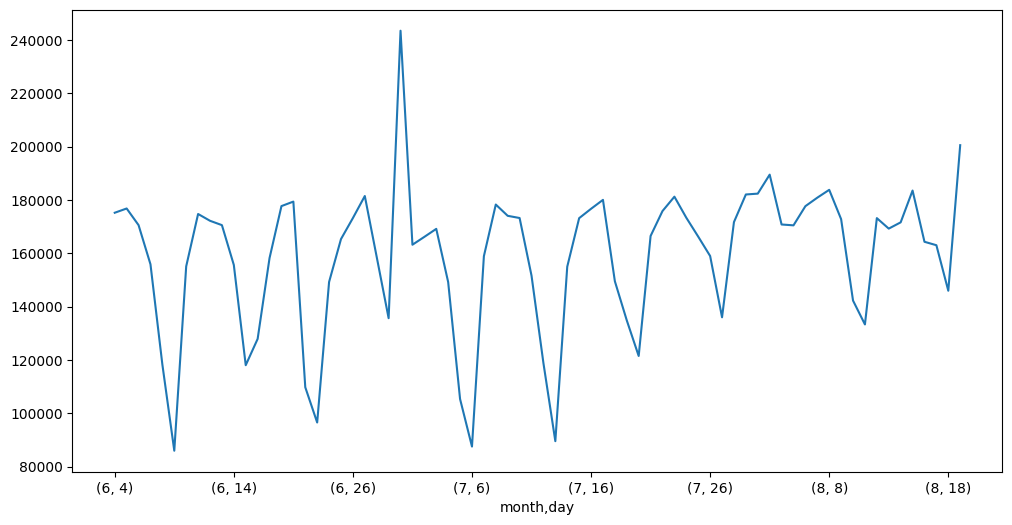

In [36]:
plt.figure(figsize=(12,6))

df.groupby(["month","day"])["usage"].sum().plot();

In [37]:
for x in [6,7,8]:
    for y in range(1,31):
        if (x == 8) & (y > 19) or (x == 6) & (y < 4) :
            pass
        else :
            if df[(df['month'] == x) & (df['day'] == y)]['usage'].sum() <= 0 :
                print(f'{x}.Month {y}.day nan') # We have 4 nan days. ### 6-20 , 6-21 , 8-3 , 8-4

6.Month 20.day nan
6.Month 21.day nan
8.Month 3.day nan
8.Month 4.day nan


In [38]:
df[(df['month'] == 6) & (df['day'] == 20)]['usage'].sum() # One of the nan days

0

In [39]:
df[(df['month'] == 6) & (df['day'] == 30)]['usage'].sum() # The day have too many usages.

243461

In [40]:
df[(df['month'] == 6) & (df['day'] == 30)] # 340 data ??? It should have been 170 or 180

,timestamp,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
4316,2017-06-30 08:05:05,1,79,397,318,6,30,8,5
4318,2017-06-30 08:05:05,4,535,3893,3358,6,30,8,5
4319,2017-06-30 08:05:05,5,52,587,535,6,30,8,5
4315,2017-06-30 08:05:05,7,733,2019,1286,6,30,8,5
4317,2017-06-30 08:05:05,8,454,2947,2493,6,30,8,5
...,...,...,...,...,...,...,...,...,...
4644,2017-06-30 16:31:16,2,475,697,222,6,30,16,31
4642,2017-06-30 16:31:16,6,892,3113,2221,6,30,16,31
4641,2017-06-30 16:31:16,7,986,2019,1033,6,30,16,31
4640,2017-06-30 16:31:16,9,520,1332,812,6,30,16,31


In [41]:
df.groupby(['month','day']).count() # We have 72 days at total.(4 of them nan)

timestamp  municipality_id  usage  total_capacity  free_to_use  \
month day                                                                   
6     4          180              180    180             180          180   
      5          180              180    180             180          180   
      6          180              180    180             180          180   
      7          180              180    180             180          180   
      8          180              180    180             180          180   
...              ...              ...    ...             ...          ...   
8     15         180              180    180             180          180   
      16         180              180    180             180          180   
      17         180              180    180             180          180   
      18         180              180    180             180          180   
      19         180              180    180             180          180   

           hour  min  
month day             
6     4     180  180  
      5     180  180  
      6     180  180  
      7     180  180  
      8     180  180  
...         ...  ...  
8     15    180  180  
      16    180  180  
      17    180  180  
      18    180  180  
      19    180  180  

[72 rows x 7 columns]

In [42]:
df.groupby(['month','day']).count()['timestamp'].unique() # All of them should have been 180 or 170. Date with 340 data probably doubled

array([180, 170, 340], dtype=int64)

In [43]:
df.groupby(['month','day']).count()[df.groupby(['month','day']).count()['timestamp'] == 180]

timestamp  municipality_id  usage  total_capacity  free_to_use  \
month day                                                                   
6     4          180              180    180             180          180   
      5          180              180    180             180          180   
      6          180              180    180             180          180   
      7          180              180    180             180          180   
      8          180              180    180             180          180   
...              ...              ...    ...             ...          ...   
8     15         180              180    180             180          180   
      16         180              180    180             180          180   
      17         180              180    180             180          180   
      18         180              180    180             180          180   
      19         180              180    180             180          180   

           hour  min  
month day             
6     4     180  180  
      5     180  180  
      6     180  180  
      7     180  180  
      8     180  180  
...         ...  ...  
8     15    180  180  
      16    180  180  
      17    180  180  
      18    180  180  
      19    180  180  

[66 rows x 7 columns]

In [44]:
df[(df['month'] == 6) & (df['day'] == 4)].head(50) # An example of the day with 180 data

,timestamp,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
0,2017-06-04 08:04:52,9,454,1332,878,6,4,8,4
1,2017-06-04 08:04:52,8,556,2947,2391,6,4,8,4
2,2017-06-04 08:04:52,4,1090,3893,2803,6,4,8,4
3,2017-06-04 08:04:52,0,204,2813,2609,6,4,8,4
4,2017-06-04 08:04:52,7,718,2019,1301,6,4,8,4
5,2017-06-04 08:04:52,5,70,587,517,6,4,8,4
6,2017-06-04 08:04:52,2,273,697,424,6,4,8,4
7,2017-06-04 08:04:52,1,129,397,268,6,4,8,4
8,2017-06-04 08:04:52,6,597,3113,2516,6,4,8,4
9,2017-06-04 08:04:52,3,623,1930,1307,6,4,8,4


In [45]:
df[(df['month'] == 6) & (df['day'] == 28)].head(50) # An example of the day with 170 data

,timestamp,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
3966,2017-06-28 08:21:51,0,194,2813,2619,6,28,8,21
3968,2017-06-28 08:21:51,5,66,587,521,6,28,8,21
3967,2017-06-28 08:21:51,1,94,397,303,6,28,8,21
3965,2017-06-28 08:21:51,7,733,2019,1286,6,28,8,21
3969,2017-06-28 08:21:51,6,734,3113,2379,6,28,8,21
3963,2017-06-28 08:21:51,4,1175,3893,2718,6,28,8,21
3962,2017-06-28 08:21:51,8,593,2947,2354,6,28,8,21
3961,2017-06-28 08:21:51,2,357,697,340,6,28,8,21
3960,2017-06-28 08:21:51,3,568,1930,1362,6,28,8,21
3964,2017-06-28 08:21:51,9,385,1332,947,6,28,8,21


In [46]:
df.groupby(['month','day']).count()[df.groupby(['month','day']).count()['timestamp'] == 170]

timestamp  municipality_id  usage  total_capacity  free_to_use  \
month day                                                                   
6     28         170              170    170             170          170   
7     18         170              170    170             170          170   
      25         170              170    170             170          170   
8     13         170              170    170             170          170   
      14         170              170    170             170          170   

           hour  min  
month day             
6     28    170  170  
7     18    170  170  
      25    170  170  
8     13    170  170  
      14    170  170

In [47]:
df.groupby(['month','day']).count()[df.groupby(['month','day']).count()['timestamp'] == 340] # But the reason why it is 340 instead of 170 should be investigated
                                                                                             # Bus services may have been doubled as it coincided with the middle of summer.
                                                                                             # But still, it is wrong to keep records 2 times in a row. We have to drop one of these 2 data

,,timestamp,municipality_id,usage,total_capacity,free_to_use,hour,min
month,day,,,,,,,
6,30,340,340,340,340,340,340,340


In [48]:
df[(df['month'] == 6) & (df['day'] == 30)].head(30) # It seems clear that 2 measurements were made on the 30th day of June, with an interval of less than 1 minute in a row.

,timestamp,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
4316,2017-06-30 08:05:05,1,79,397,318,6,30,8,5
4318,2017-06-30 08:05:05,4,535,3893,3358,6,30,8,5
4319,2017-06-30 08:05:05,5,52,587,535,6,30,8,5
4315,2017-06-30 08:05:05,7,733,2019,1286,6,30,8,5
4317,2017-06-30 08:05:05,8,454,2947,2493,6,30,8,5
4313,2017-06-30 08:05:05,2,346,697,351,6,30,8,5
4312,2017-06-30 08:05:05,3,284,1930,1646,6,30,8,5
4311,2017-06-30 08:05:05,0,90,2813,2723,6,30,8,5
4310,2017-06-30 08:05:05,9,396,1332,936,6,30,8,5
4314,2017-06-30 08:05:05,6,666,3113,2447,6,30,8,5


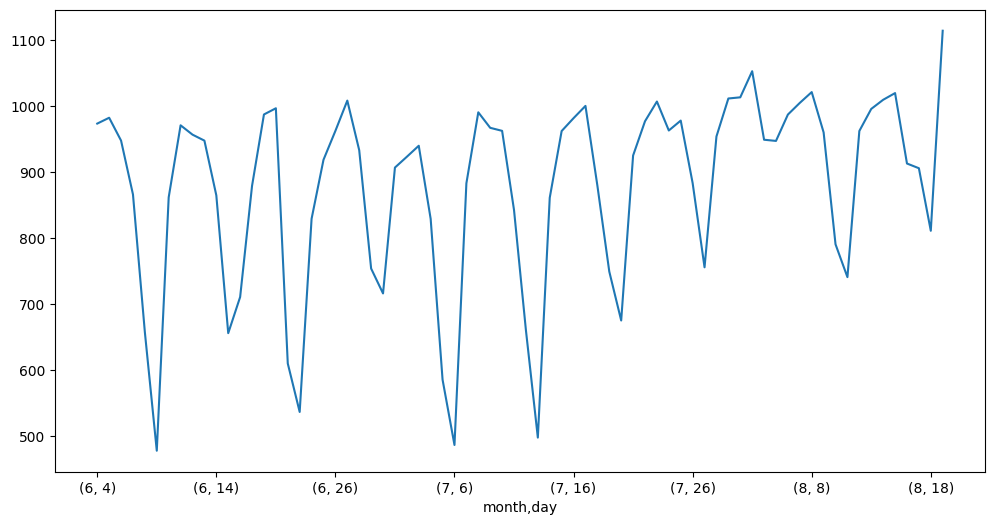

In [49]:
plt.figure(figsize=(12,6))

df.groupby(["month","day"])["usage"].mean().plot();

In [50]:
df[(df['month'] == 6) & (df['day'] == 30)]['timestamp'].unique()

array(['2017-06-30T08:05:05.000000000', '2017-06-30T08:05:13.000000000',
       '2017-06-30T08:31:03.000000000', '2017-06-30T08:31:12.000000000',
       '2017-06-30T09:05:02.000000000', '2017-06-30T09:05:10.000000000',
       '2017-06-30T09:31:07.000000000', '2017-06-30T09:31:13.000000000',
       '2017-06-30T10:05:02.000000000', '2017-06-30T10:05:15.000000000',
       '2017-06-30T10:31:04.000000000', '2017-06-30T10:31:12.000000000',
       '2017-06-30T11:05:06.000000000', '2017-06-30T11:05:12.000000000',
       '2017-06-30T11:31:05.000000000', '2017-06-30T11:31:14.000000000',
       '2017-06-30T12:05:08.000000000', '2017-06-30T12:05:14.000000000',
       '2017-06-30T12:31:16.000000000', '2017-06-30T12:32:04.000000000',
       '2017-06-30T13:05:16.000000000', '2017-06-30T13:12:09.000000000',
       '2017-06-30T13:31:09.000000000', '2017-06-30T13:31:11.000000000',
       '2017-06-30T14:04:57.000000000', '2017-06-30T14:05:09.000000000',
       '2017-06-30T14:31:15.000000000', '2017-06-30

In [51]:
drop_stamptimes = df[(df['month'] == 6) & (df['day'] == 30)]['timestamp'].unique()[[0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32]]
drop_stamptimes

array(['2017-06-30T08:05:05.000000000', '2017-06-30T08:31:03.000000000',
       '2017-06-30T09:05:02.000000000', '2017-06-30T09:31:07.000000000',
       '2017-06-30T10:05:02.000000000', '2017-06-30T10:31:04.000000000',
       '2017-06-30T11:05:06.000000000', '2017-06-30T11:31:05.000000000',
       '2017-06-30T12:05:08.000000000', '2017-06-30T12:31:16.000000000',
       '2017-06-30T13:05:16.000000000', '2017-06-30T13:31:09.000000000',
       '2017-06-30T14:04:57.000000000', '2017-06-30T14:31:15.000000000',
       '2017-06-30T15:05:10.000000000', '2017-06-30T15:32:14.000000000',
       '2017-06-30T16:05:17.000000000'], dtype='datetime64[ns]')

In [52]:
drop_indexes = df[df['timestamp'].isin(drop_stamptimes)].index
drop_indexes

Int64Index([4316, 4318, 4319, 4315, 4317, 4313, 4312, 4311, 4310, 4314,
            ...
            4639, 4638, 4636, 4635, 4637, 4633, 4632, 4631, 4630, 4634],
           dtype='int64', length=170)

In [53]:
df.drop(drop_indexes , axis = 0 , inplace = True)

In [54]:
df.reset_index(drop=True)

,timestamp,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
0,2017-06-04 08:04:52,9,454,1332,878,6,4,8,4
1,2017-06-04 08:04:52,8,556,2947,2391,6,4,8,4
2,2017-06-04 08:04:52,4,1090,3893,2803,6,4,8,4
3,2017-06-04 08:04:52,0,204,2813,2609,6,4,8,4
4,2017-06-04 08:04:52,7,718,2019,1301,6,4,8,4
...,...,...,...,...,...,...,...,...,...
12895,2017-08-19 16:35:45,5,202,587,385,8,19,16,35
12896,2017-08-19 16:35:45,2,548,697,149,8,19,16,35
12897,2017-08-19 16:35:45,8,1193,2947,1754,8,19,16,35
12898,2017-08-19 16:35:45,7,1354,2019,665,8,19,16,35


In [55]:
df.groupby(['month','day']).count()['timestamp'].unique()

array([180, 170], dtype=int64)

In [56]:
df['hour'].value_counts() # Still perfect, nice !

10    1440
12    1440
14    1440
15    1440
9     1430
11    1430
13    1430
16    1430
8     1420
Name: hour, dtype: int64

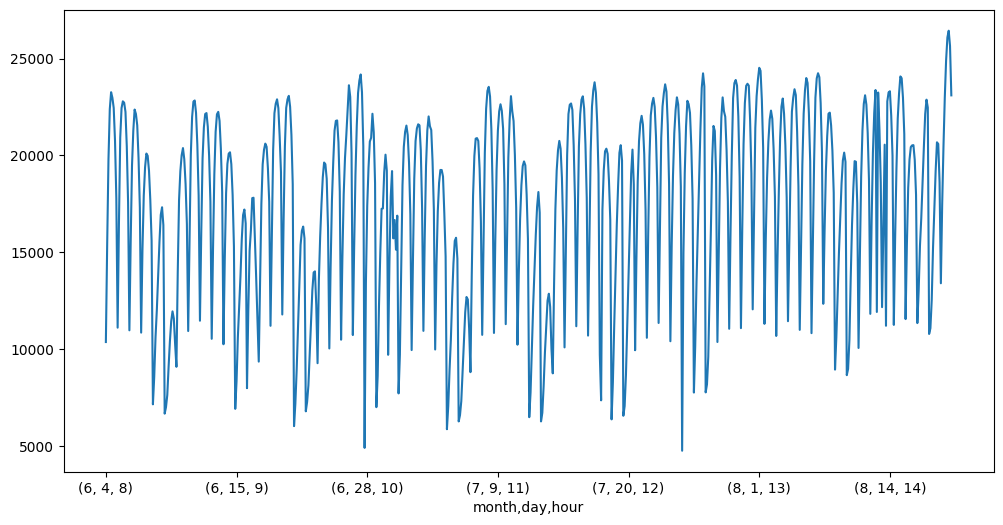

In [57]:
plt.figure(figsize=(12,6))

df.groupby(["month","day",'hour'])["usage"].sum().plot();

In [58]:
df.groupby(["month","day",'hour'])["usage"].sum().describe()

count      648.000000
mean     17498.862654
std       4825.932062
min       4753.000000
25%      14335.750000
50%      18816.500000
75%      21372.500000
max      26442.000000
Name: usage, dtype: float64

In [59]:
nan_hours_counter = 0
risky_hours_counter = 0

for month in range(6,9):
        for day in range(1,31):
            if ((month == 6) & (day < 4)) | ((month == 8) & (day > 19)) : 
                pass
            else:
                for hour in range(8,17):
                    total_usage = df[(df['month'] == month) & (df['day'] == day) & (df['hour'] == hour)]['usage'].sum()
                    if total_usage == 0 :
                        print(f'Warning ! {month}.month {day}.day and {hour}.hour has 0 total usage and nan hour !!!')
                        nan_hours_counter += 1
                    elif (total_usage > 24000) | (total_usage < 5000) :
                        print(f'{month}.month {day}.day and {hour}.hour has {total_usage} total usage be careful') # Anormal day and hours.
                        risky_hours_counter += 1

print(f"Total nan hours : {nan_hours_counter}")
print(f"Total risky hours : {risky_hours_counter}")

# Total 4 day nan.
# Total 36 hours nan(4x9 hours per day.)

Warning ! 6.month 20.day and 8.hour has 0 total usage and nan hour !!!
Warning ! 6.month 20.day and 9.hour has 0 total usage and nan hour !!!
Warning ! 6.month 20.day and 10.hour has 0 total usage and nan hour !!!
Warning ! 6.month 20.day and 11.hour has 0 total usage and nan hour !!!
Warning ! 6.month 20.day and 12.hour has 0 total usage and nan hour !!!
Warning ! 6.month 20.day and 13.hour has 0 total usage and nan hour !!!
Warning ! 6.month 20.day and 14.hour has 0 total usage and nan hour !!!
Warning ! 6.month 20.day and 15.hour has 0 total usage and nan hour !!!
Warning ! 6.month 20.day and 16.hour has 0 total usage and nan hour !!!
Warning ! 6.month 21.day and 8.hour has 0 total usage and nan hour !!!
Warning ! 6.month 21.day and 9.hour has 0 total usage and nan hour !!!
Warning ! 6.month 21.day and 10.hour has 0 total usage and nan hour !!!
Warning ! 6.month 21.day and 11.hour has 0 total usage and nan hour !!!
Warning ! 6.month 21.day and 12.hour has 0 total usage and nan hour 

In [60]:
df[(df['month'] == 6) & (df['day'] == 1) & (df['hour'] == 8)]['usage'].sum() # One of the nan hours.

0

In [61]:
df[(df['month'] == 6) & (df['day'] == 27) & (df['hour'] == 14)]['usage'].sum() # One of the most usage hours

24182

In [62]:
df[(df['month'] == 7) & (df['day'] == 25) & (df['hour'] == 8)]['usage'].sum() # One of the less usage hours

4753

In [63]:
df[(df['month'] == 6) & (df['day'] == 30)].head(30) # 30.th june normal now.

,timestamp,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
4472,2017-06-30 08:05:13,1,79,397,318,6,30,8,5
4473,2017-06-30 08:05:13,2,317,697,380,6,30,8,5
4474,2017-06-30 08:05:13,3,578,1930,1352,6,30,8,5
4475,2017-06-30 08:05:13,4,1066,3893,2827,6,30,8,5
4476,2017-06-30 08:05:13,8,513,2947,2434,6,30,8,5
4477,2017-06-30 08:05:13,7,653,2019,1366,6,30,8,5
4478,2017-06-30 08:05:13,9,345,1332,987,6,30,8,5
4479,2017-06-30 08:05:13,5,58,587,529,6,30,8,5
4470,2017-06-30 08:05:13,0,141,2813,2672,6,30,8,5
4471,2017-06-30 08:05:13,6,632,3113,2481,6,30,8,5


# Interpolation (Filling nan hours)

In [64]:
# 6.Month 20-21 , 8.Month 3-4

 # OR

# 6.Month 20-21 , 7.Month 31 , 8.Month 3-4

In [65]:
# Municipality_id and Total capacities
# 9 --> 1332
# 8 --> 2947
# 7 --> 2019
# 6 --> 3113
# 5 --> 587
# 4 --> 3893
# 3 --> 1930
# 2 --> 697
# 1 --> 397
# 0 --> 2813

In [66]:
df.set_index('timestamp' , drop=True , inplace=True)

In [67]:
df

,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
timestamp,,,,,,,,
2017-06-04 08:04:52,9,454,1332,878,6,4,8,4
2017-06-04 08:04:52,8,556,2947,2391,6,4,8,4
2017-06-04 08:04:52,4,1090,3893,2803,6,4,8,4
2017-06-04 08:04:52,0,204,2813,2609,6,4,8,4
2017-06-04 08:04:52,7,718,2019,1301,6,4,8,4
...,...,...,...,...,...,...,...,...
2017-08-19 16:35:45,5,202,587,385,8,19,16,35
2017-08-19 16:35:45,2,548,697,149,8,19,16,35
2017-08-19 16:35:45,8,1193,2947,1754,8,19,16,35


In [68]:
df[df['municipality_id'] == 9]['total_capacity'].unique()

array([1332], dtype=int64)

In [69]:
# Define the specific dates to include
specific_dates = ['2017-06-20','2017-06-21',
                  '2017-08-03','2017-08-04']

# Create a list to store the dataframes
df_list = []

# Loop through the specific dates
for date in specific_dates:
    # Create timestamp range for each day
    timestamp_range = pd.date_range(date + ' 08:00:00', date + ' 16:30:00', freq='30T')

    # Get the unique municipality ids for that date
    municipality_ids = df['municipality_id'].unique()
    
    # Loop through the municipality_ids
    for municipality_id in municipality_ids:
        # Create a new dataframe for each municipality_id
        df_temp = pd.DataFrame(index=timestamp_range)
        df_temp['municipality_id'] = municipality_id
        df_temp = df_temp.join(df.loc[(df['municipality_id'] == municipality_id) & (df.index.date == date), 'usage'])
        # Append the dataframe to the list
        df_list.append(df_temp)

# Concatenate the dataframes together
result_df = pd.concat(df_list)

result_df = result_df.sort_index()

In [70]:
result_df

,municipality_id,usage
2017-06-20 08:00:00,9,NaN
2017-06-20 08:00:00,2,NaN
2017-06-20 08:00:00,5,NaN
2017-06-20 08:00:00,6,NaN
2017-06-20 08:00:00,7,NaN
...,...,...
2017-08-04 16:30:00,7,NaN
2017-08-04 16:30:00,5,NaN
2017-08-04 16:30:00,2,NaN
2017-08-04 16:30:00,9,NaN


In [71]:
df = pd.concat([df,result_df],ignore_index=False).sort_index()
df

,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
2017-06-04 08:04:52,9,454.0,1332.0,878.0,6.0,4.0,8.0,4.0
2017-06-04 08:04:52,8,556.0,2947.0,2391.0,6.0,4.0,8.0,4.0
2017-06-04 08:04:52,4,1090.0,3893.0,2803.0,6.0,4.0,8.0,4.0
2017-06-04 08:04:52,0,204.0,2813.0,2609.0,6.0,4.0,8.0,4.0
2017-06-04 08:04:52,7,718.0,2019.0,1301.0,6.0,4.0,8.0,4.0
...,...,...,...,...,...,...,...,...
2017-08-19 16:35:45,9,815.0,1332.0,517.0,8.0,19.0,16.0,35.0
2017-08-19 16:35:45,5,202.0,587.0,385.0,8.0,19.0,16.0,35.0
2017-08-19 16:35:45,2,548.0,697.0,149.0,8.0,19.0,16.0,35.0
2017-08-19 16:35:45,8,1193.0,2947.0,1754.0,8.0,19.0,16.0,35.0


In [72]:
df.isna().sum()

municipality_id      0
usage              720
total_capacity     720
free_to_use        720
month              720
day                720
hour               720
min                720
dtype: int64

In [73]:
# df['total_capacity'] = df.groupby("municipality_id")['total_capacity'].apply(lambda x: x.fillna(method='ffill'))
# df['total_capacity'] = df.groupby("municipality_id")['total_capacity'].apply(lambda x: x.fillna(method='bfill'))

In [74]:
df['total_capacity'] = df.replace({'municipality_id': {9: 1332, 8: 2947, 7: 2019, 6: 3113, 5: 587, 4: 3893, 3: 1930, 2: 687, 1: 397, 0: 2813}})['municipality_id']
df

,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
2017-06-04 08:04:52,9,454.0,1332,878.0,6.0,4.0,8.0,4.0
2017-06-04 08:04:52,8,556.0,2947,2391.0,6.0,4.0,8.0,4.0
2017-06-04 08:04:52,4,1090.0,3893,2803.0,6.0,4.0,8.0,4.0
2017-06-04 08:04:52,0,204.0,2813,2609.0,6.0,4.0,8.0,4.0
2017-06-04 08:04:52,7,718.0,2019,1301.0,6.0,4.0,8.0,4.0
...,...,...,...,...,...,...,...,...
2017-08-19 16:35:45,9,815.0,1332,517.0,8.0,19.0,16.0,35.0
2017-08-19 16:35:45,5,202.0,587,385.0,8.0,19.0,16.0,35.0
2017-08-19 16:35:45,2,548.0,687,149.0,8.0,19.0,16.0,35.0
2017-08-19 16:35:45,8,1193.0,2947,1754.0,8.0,19.0,16.0,35.0


In [75]:
df[df['municipality_id'] == 9]['total_capacity'].unique()

array([1332], dtype=int64)

In [76]:
df['month'] = df.index.month
df['day'] = df.index.day
df['hour'] = df.index.hour
df['min'] = df.index.minute

In [77]:
df.drop('free_to_use' , axis = 1 , inplace = True)

In [78]:
df.isna().sum()

municipality_id      0
usage              720
total_capacity       0
month                0
day                  0
hour                 0
min                  0
dtype: int64

In [79]:
df_0 = df[df['municipality_id'] == 0][['usage']]
df_1 = df[df['municipality_id'] == 1][['usage']]
df_2 = df[df['municipality_id'] == 2][['usage']]
df_3 = df[df['municipality_id'] == 3][['usage']]
df_4 = df[df['municipality_id'] == 4][['usage']]
df_5 = df[df['municipality_id'] == 5][['usage']]
df_6 = df[df['municipality_id'] == 6][['usage']]
df_7 = df[df['municipality_id'] == 7][['usage']]
df_8 = df[df['municipality_id'] == 8][['usage']]
df_9 = df[df['municipality_id'] == 9][['usage']]

In [80]:
df_0

,usage
2017-06-04 08:04:52,204.0
2017-06-04 08:30:52,247.0
2017-06-04 09:04:52,332.0
2017-06-04 09:37:56,429.0
2017-06-04 10:04:58,485.0
...,...
2017-08-19 14:35:43,1285.0
2017-08-19 15:08:44,1283.0
2017-08-19 15:34:43,1286.0
2017-08-19 16:08:45,1276.0


In [81]:
df_0.shape

(1362, 1)

In [82]:
df_0.isna().sum() 

usage    72
dtype: int64

In [83]:
df_0.index = df_0.index.floor('H')  # df_0.index = pd.to_datetime(df_0.index, format='%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d %H')
df_0 = (df_0.groupby(df_0.index).max()).replace(0,np.nan) # df_0 = df_0.resample('H').max()

df_1.index = df_1.index.floor('H') 
df_1 = (df_1.groupby(df_1.index).max()).replace(0,np.nan)

df_2.index = df_2.index.floor('H') 
df_2 = (df_2.groupby(df_2.index).max()).replace(0,np.nan)

df_3.index = df_3.index.floor('H') 
df_3 = (df_3.groupby(df_3.index).max()).replace(0,np.nan)

df_4.index = df_4.index.floor('H') 
df_4 = (df_4.groupby(df_4.index).max()).replace(0,np.nan)

df_5.index = df_5.index.floor('H') 
df_5 = (df_5.groupby(df_5.index).max()).replace(0,np.nan)

df_6.index = df_6.index.floor('H') 
df_6 = (df_6.groupby(df_6.index).max()).replace(0,np.nan)

df_7.index = df_7.index.floor('H') 
df_7 = (df_7.groupby(df_7.index).max()).replace(0,np.nan)

df_8.index = df_8.index.floor('H') 
df_8 = (df_8.groupby(df_8.index).max()).replace(0,np.nan)

df_9.index = df_9.index.floor('H') 
df_9 = (df_9.groupby(df_9.index).max()).replace(0,np.nan)

In [84]:
df_0 # 684 rows means 76 days and 9 hours per day so 76x9 = 684

,usage
2017-06-04 08:00:00,247.0
2017-06-04 09:00:00,429.0
2017-06-04 10:00:00,534.0
2017-06-04 11:00:00,597.0
2017-06-04 12:00:00,614.0
...,...
2017-08-19 12:00:00,1281.0
2017-08-19 13:00:00,1283.0
2017-08-19 14:00:00,1285.0
2017-08-19 15:00:00,1286.0


In [85]:
df_0.isna().sum()

usage    36
dtype: int64

In [86]:
start_date = pd.to_datetime('2017-06-21')
end_date = pd.to_datetime('2017-06-21 23:59:59')

df_0.loc[(df_0.index >= start_date) & (df_0.index <= end_date)] # df.between_time(start_date, end_date)

,usage
2017-06-21 08:00:00,NaN
2017-06-21 09:00:00,NaN
2017-06-21 10:00:00,NaN
2017-06-21 11:00:00,NaN
2017-06-21 12:00:00,NaN
2017-06-21 13:00:00,NaN
2017-06-21 14:00:00,NaN
2017-06-21 15:00:00,NaN
2017-06-21 16:00:00,NaN


In [87]:
df_0 = df_0.interpolate(method='linear' , axis=0, inplace=False)
df_1 = df_1.interpolate(method='linear' , axis=0, inplace=False)
df_2 = df_2.interpolate(method='linear' , axis=0, inplace=False)
df_3 = df_3.interpolate(method='linear' , axis=0, inplace=False)
df_4 = df_4.interpolate(method='linear' , axis=0, inplace=False)
df_5 = df_5.interpolate(method='linear' , axis=0, inplace=False)
df_6 = df_6.interpolate(method='linear' , axis=0, inplace=False)
df_7 = df_7.interpolate(method='linear' , axis=0, inplace=False)
df_8 = df_8.interpolate(method='linear' , axis=0, inplace=False)
df_9 = df_9.interpolate(method='linear' , axis=0, inplace=False)

# Interpolate doesn't work well. To get a more accurate result, a more sensible filling process can be considered.

In [88]:
df_0

,usage
2017-06-04 08:00:00,247.0
2017-06-04 09:00:00,429.0
2017-06-04 10:00:00,534.0
2017-06-04 11:00:00,597.0
2017-06-04 12:00:00,614.0
...,...
2017-08-19 12:00:00,1281.0
2017-08-19 13:00:00,1283.0
2017-08-19 14:00:00,1285.0
2017-08-19 15:00:00,1286.0


In [89]:
df_0.isna().sum()

usage    0
dtype: int64

In [90]:
start_date = pd.to_datetime('2017-06-21')
end_date = pd.to_datetime('2017-06-21 23:59:59')

df_0.loc[(df_0.index >= start_date) & (df_0.index <= end_date)] # df.between_time(start_date, end_date)

,usage
2017-06-21 08:00:00,380.052632
2017-06-21 09:00:00,347.157895
2017-06-21 10:00:00,314.263158
2017-06-21 11:00:00,281.368421
2017-06-21 12:00:00,248.473684
2017-06-21 13:00:00,215.578947
2017-06-21 14:00:00,182.684211
2017-06-21 15:00:00,149.789474
2017-06-21 16:00:00,116.894737


# Train | Test Split

In [91]:
df_0_test = df_0[-126:]
df_1_test = df_1[-126:]
df_2_test = df_2[-126:]
df_3_test = df_3[-126:]
df_4_test = df_4[-126:]
df_5_test = df_5[-126:]
df_6_test = df_6[-126:]
df_7_test = df_7[-126:]
df_8_test = df_8[-126:]
df_9_test = df_9[-126:]

In [92]:
df_0_test_2w = df_0_test[-63:]
df_1_test_2w = df_1_test[-63:]
df_2_test_2w = df_2_test[-63:]
df_3_test_2w = df_3_test[-63:]
df_4_test_2w = df_4_test[-63:]
df_5_test_2w = df_5_test[-63:]
df_6_test_2w = df_6_test[-63:]
df_7_test_2w = df_7_test[-63:]
df_8_test_2w = df_8_test[-63:]
df_9_test_2w = df_9_test[-63:]

In [93]:
df_0_test_1w = df_0_test[:-63]
df_1_test_1w = df_1_test[:-63]
df_2_test_1w = df_2_test[:-63]
df_3_test_1w = df_3_test[:-63]
df_4_test_1w = df_4_test[:-63]
df_5_test_1w = df_5_test[:-63]
df_6_test_1w = df_6_test[:-63]
df_7_test_1w = df_7_test[:-63]
df_8_test_1w = df_8_test[:-63]
df_9_test_1w = df_9_test[:-63]

In [94]:
df_0_train = df_0[:-126]
df_1_train = df_0[:-126]
df_2_train = df_0[:-126]
df_3_train = df_0[:-126]
df_4_train = df_0[:-126]
df_5_train = df_0[:-126]
df_6_train = df_0[:-126]
df_7_train = df_0[:-126]
df_8_train = df_0[:-126]
df_9_train = df_0[:-126]

# ----------Modelling-------------

In [95]:
import tensorflow as tf

# set random seed for numpy
np.random.seed(0)

# set random seed for tensorflow
tf.random.set_seed(0)

# Municipality 0 test scores

## 1) Moving Average Model

### Data Preparation

In [96]:
df_0_train_ma = df_0_train.copy()
df_0_test_ma = df_0_test.copy()
df_0_test_1w_ma = df_0_test_1w.copy()
df_0_test_2w_ma = df_0_test_2w.copy()

In [97]:
df_0_train_ma['date'] = df_0_train_ma.index
df_0_train_ma = df_0_train_ma.iloc[:,[1,0]]
df_0_train_ma.reset_index(drop=True , inplace=True)

df_0_test_ma['date'] = df_0_test_ma.index
df_0_test_ma = df_0_test_ma.iloc[:,[1,0]]
df_0_test_ma.reset_index(drop=True , inplace=True)

df_0_test_1w_ma['date'] = df_0_test_1w_ma.index
df_0_test_1w_ma = df_0_test_1w_ma.iloc[:,[1,0]]
df_0_test_1w_ma.reset_index(drop=True , inplace=True)

df_0_test_2w_ma['date'] = df_0_test_2w_ma.index
df_0_test_2w_ma = df_0_test_2w_ma.iloc[:,[1,0]]
df_0_test_2w_ma.reset_index(drop=True , inplace=True)

In [98]:
from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(df_0_train_ma.usage)
   
print(f'ADF Statistic: {ADF_result[0]}') 
print(f'p-value: {ADF_result[1]}')   # stationary 

ADF Statistic: -3.7550823395083968
p-value: 0.0034018043460963465


In [99]:
# usages_diff = np.diff(df_0_train_ma.usage, n=1)

# ADF_result = adfuller(usages_diff)

# print(f'ADF Statistic: {ADF_result[0]}') 
# print(f'p-value: {ADF_result[1]}')   # now stationary 

### Build a Moving Average Model

#### Predict 1.Week of Test Data

In [100]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the model on the training data
model = ExponentialSmoothing(df_0_train_ma['usage'], seasonal_periods=9, seasonal='multiplicative')
model_fit = model.fit()

# Use the model to make predictions on the test data
predictions_train = model_fit.forecast(len(df_0_train_ma))
predictions = model_fit.forecast(len(df_0_test_1w_ma))

# Combine the actual and predicted values into a single dataframe
result_1w_ma = pd.concat([df_0_test_1w_ma[['date','usage']].reset_index(drop=True), pd.DataFrame(predictions, columns=['Predicted']).reset_index(drop=True)], axis=1)
result_1w_ma.set_index('date' , drop=True , inplace=True)

In [101]:
result_1w_ma

,usage,Predicted
date,,
2017-08-06 08:00:00,329.0,215.354906
2017-08-06 09:00:00,459.0,309.144461
2017-08-06 10:00:00,569.0,399.711010
2017-08-06 11:00:00,648.0,461.893055
2017-08-06 12:00:00,653.0,506.178513
...,...,...
2017-08-12 12:00:00,623.0,506.178513
2017-08-12 13:00:00,624.0,519.633838
2017-08-12 14:00:00,619.0,551.988676


### Evaluation MA on 1.Week of Test Data

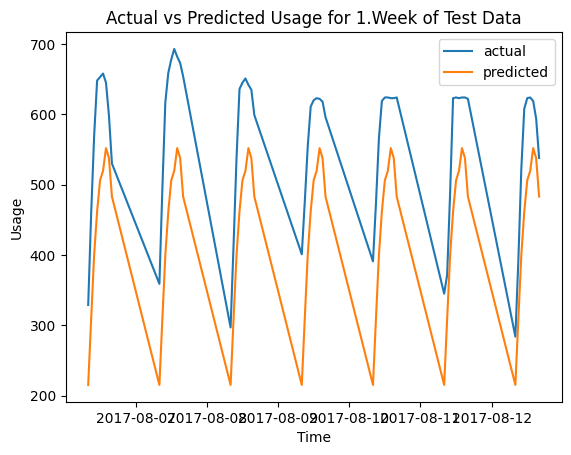

In [102]:
# Plot actual vs predicted values
plt.plot(result_1w_ma['usage'], label='actual')
plt.plot(result_1w_ma['Predicted'], label='predicted')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Usage')
plt.title('Actual vs Predicted Usage for 1.Week of Test Data')

plt.show()

In [103]:
# Compare the predictions with the actual values
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score

def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    # score = r2_score(actual, pred)
    return print("\nmae:", mae,  "\nrmse:", rmse , "\nmse:",mse,)

In [104]:
eval_metrics(result_1w_ma['usage'] , result_1w_ma['Predicted'])


mae: 123.76530965177139 
rmse: 130.3248582011511 
mse: 16984.568665150142


In [105]:
# Done

#### Predict 2.Week of Test Data

In [106]:
df_0_train1w_ma = pd.concat([df_0_train_ma , df_0_test_1w_ma])
df_0_train1w_ma

,date,usage
0,2017-06-04 08:00:00,247.0
1,2017-06-04 09:00:00,429.0
2,2017-06-04 10:00:00,534.0
3,2017-06-04 11:00:00,597.0
4,2017-06-04 12:00:00,614.0
...,...,...
58,2017-08-12 12:00:00,623.0
59,2017-08-12 13:00:00,624.0
60,2017-08-12 14:00:00,619.0
61,2017-08-12 15:00:00,594.0


In [107]:
# Fit the model on the training data
model = ExponentialSmoothing(df_0_train1w_ma['usage'], seasonal_periods=9, seasonal='multiplicative')
model_fit = model.fit()

# Use the model to make predictions on the test data
predictions = model_fit.forecast(len(df_0_test_2w_ma))

# Combine the actual and predicted values into a single dataframe
result_2w = pd.concat([df_0_test_2w_ma[['date','usage']].reset_index(drop=True), pd.DataFrame(predictions, columns=['Predicted']).reset_index(drop=True)], axis=1)
result_2w.set_index('date' , drop=True , inplace=True)

C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [108]:
result_2w

,usage,Predicted
date,,
2017-08-13 08:00:00,314.0,247.365315
2017-08-13 09:00:00,456.0,349.084531
2017-08-13 10:00:00,551.0,449.842496
2017-08-13 11:00:00,617.0,519.009938
2017-08-13 12:00:00,635.0,563.968805
...,...,...
2017-08-19 12:00:00,1281.0,563.968805
2017-08-19 13:00:00,1283.0,578.119464
2017-08-19 14:00:00,1285.0,610.049913


### Evaluation MA on the 2.Week of Test Data

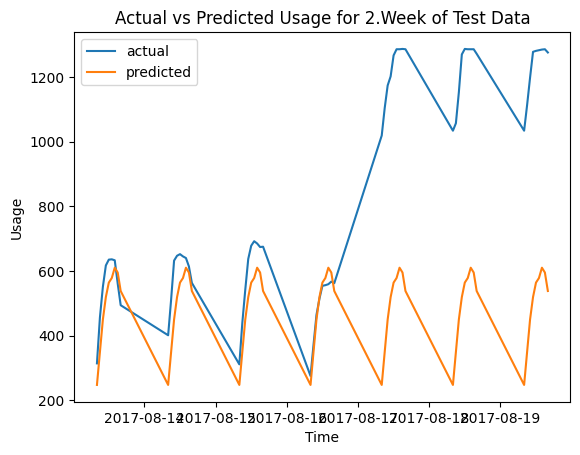

In [109]:
# Plot actual vs predicted values
plt.plot(result_2w['usage'], label='actual')
plt.plot(result_2w['Predicted'], label='predicted')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Usage')
plt.title('Actual vs Predicted Usage for 2.Week of Test Data')

plt.show()

In [110]:
eval_metrics(result_2w['usage'] , result_2w['Predicted'])


mae: 350.2820059442276 
rmse: 478.2038600873101 
mse: 228678.93180240362


In [111]:
# Done

## 2) Prophet Model

### Data Preparation

In [112]:
df_0_train_prop = df_0_train.copy()
df_0_test_prop = df_0_test.copy()
df_0_test_1w_prop = df_0_test_1w.copy()
df_0_test_2w_prop = df_0_test_2w.copy()

In [113]:
df_0_train_prop['ds'] = df_0_train_prop.index
df_0_train_prop = df_0_train_prop.iloc[:,[1,0]]
df_0_train_prop.rename(columns = {'usage':'y'} , inplace=True)
df_0_train_prop.reset_index(inplace=True , drop = True)
df_0_train_prop

,ds,y
0,2017-06-04 08:00:00,247.0
1,2017-06-04 09:00:00,429.0
2,2017-06-04 10:00:00,534.0
3,2017-06-04 11:00:00,597.0
4,2017-06-04 12:00:00,614.0
...,...,...
553,2017-08-05 12:00:00,655.0
554,2017-08-05 13:00:00,649.0
555,2017-08-05 14:00:00,622.0
556,2017-08-05 15:00:00,559.0


In [114]:
df_0_test_prop['ds'] = df_0_test_prop.index
df_0_test_prop = df_0_test_prop.iloc[:,[1,0]]
df_0_test_prop.rename(columns = {'usage':'y'} , inplace=True)
df_0_test_prop.reset_index(inplace=True , drop = True)
df_0_test_prop

,ds,y
0,2017-08-06 08:00:00,329.0
1,2017-08-06 09:00:00,459.0
2,2017-08-06 10:00:00,569.0
3,2017-08-06 11:00:00,648.0
4,2017-08-06 12:00:00,653.0
...,...,...
121,2017-08-19 12:00:00,1281.0
122,2017-08-19 13:00:00,1283.0
123,2017-08-19 14:00:00,1285.0
124,2017-08-19 15:00:00,1286.0


In [115]:
df_0_test_1w_prop['ds'] = df_0_test_1w_prop.index
df_0_test_1w_prop = df_0_test_1w_prop.iloc[:,[1,0]]
df_0_test_1w_prop.rename(columns = {'usage':'y'} , inplace=True)
df_0_test_1w_prop.reset_index(inplace=True , drop = True)
df_0_test_1w_prop

,ds,y
0,2017-08-06 08:00:00,329.0
1,2017-08-06 09:00:00,459.0
2,2017-08-06 10:00:00,569.0
3,2017-08-06 11:00:00,648.0
4,2017-08-06 12:00:00,653.0
...,...,...
58,2017-08-12 12:00:00,623.0
59,2017-08-12 13:00:00,624.0
60,2017-08-12 14:00:00,619.0
61,2017-08-12 15:00:00,594.0


In [116]:
df_0_test_2w_prop['ds'] = df_0_test_2w_prop.index
df_0_test_2w_prop = df_0_test_2w_prop.iloc[:,[1,0]]
df_0_test_2w_prop.rename(columns = {'usage':'y'} , inplace=True)
df_0_test_2w_prop.reset_index(inplace=True , drop = True)
df_0_test_2w_prop

,ds,y
0,2017-08-13 08:00:00,314.0
1,2017-08-13 09:00:00,456.0
2,2017-08-13 10:00:00,551.0
3,2017-08-13 11:00:00,617.0
4,2017-08-13 12:00:00,635.0
...,...,...
58,2017-08-19 12:00:00,1281.0
59,2017-08-19 13:00:00,1283.0
60,2017-08-19 14:00:00,1285.0
61,2017-08-19 15:00:00,1286.0


### Build prophet model

### Predict 1.Week of Test Data

In [117]:
from prophet import Prophet

# Create a new Prophet model
model = Prophet()

# Fit the model to the training data
model.fit(df_0_train_prop)

# Make predictions on the test data
forecast_test_1w_prop = model.predict(df_0_test_1w_prop[['ds']])
df_0_test_1w_prop['predictions'] = forecast_test_1w_prop.yhat

Importing plotly failed. Interactive plots will not work.
11:35:49 - cmdstanpy - INFO - Chain [1] start processing
11:35:49 - cmdstanpy - INFO - Chain [1] done processing


In [118]:
df_0_test_1w_prop

,ds,y,predictions
0,2017-08-06 08:00:00,329.0,315.314082
1,2017-08-06 09:00:00,459.0,433.291467
2,2017-08-06 10:00:00,569.0,548.741458
3,2017-08-06 11:00:00,648.0,625.584944
4,2017-08-06 12:00:00,653.0,666.516864
...,...,...,...
58,2017-08-12 12:00:00,623.0,627.104823
59,2017-08-12 13:00:00,624.0,655.759603
60,2017-08-12 14:00:00,619.0,670.412036
61,2017-08-12 15:00:00,594.0,651.465976


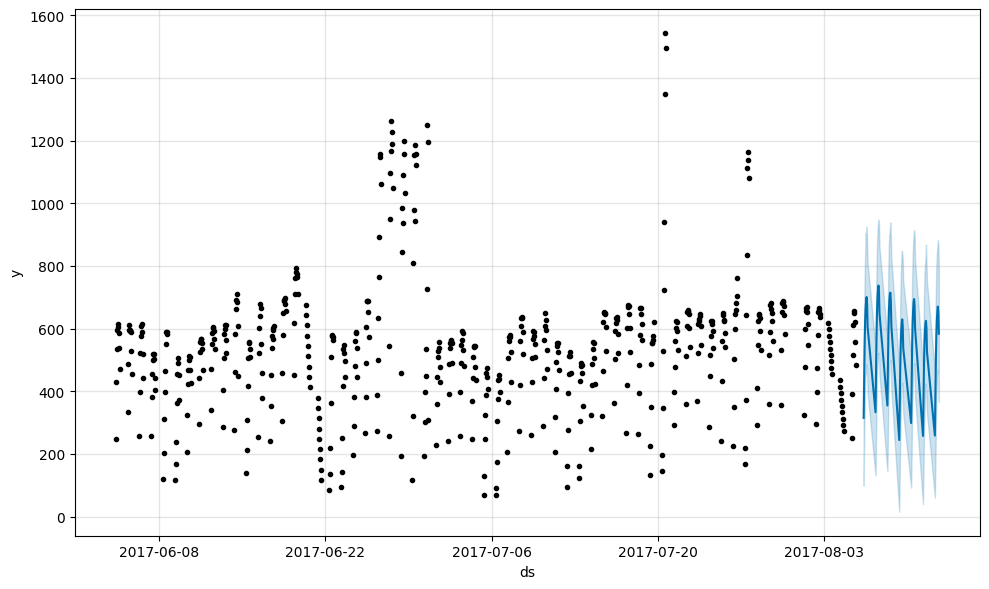

In [119]:
model.plot(forecast_test_1w_prop);
# model.plot_components(forecast_test_1w_prop);

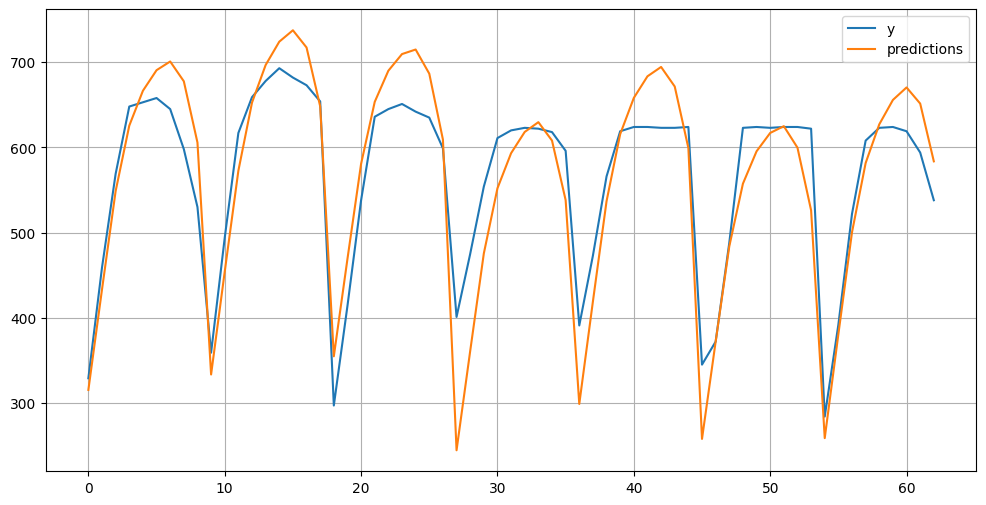

In [120]:
df_0_test_1w_prop.plot(y=['y','predictions'],figsize=(12,6),grid=True);

In [121]:
eval_metrics(df_0_test_1w_prop['y'] , df_0_test_1w_prop['predictions'] )


mae: 40.34973673917049 
rmse: 50.53197998214961 
mse: 2553.481000916369


In [122]:
# Done

### Build a new prophet model with train1w data

### Predict the 2.Week of Test Data

In [123]:
df_0_train1w_prop = pd.concat([df_0_train_prop , df_0_test_1w_prop.drop('predictions' , axis=1)])
df_0_train1w_prop

,ds,y
0,2017-06-04 08:00:00,247.0
1,2017-06-04 09:00:00,429.0
2,2017-06-04 10:00:00,534.0
3,2017-06-04 11:00:00,597.0
4,2017-06-04 12:00:00,614.0
...,...,...
58,2017-08-12 12:00:00,623.0
59,2017-08-12 13:00:00,624.0
60,2017-08-12 14:00:00,619.0
61,2017-08-12 15:00:00,594.0


In [124]:
df_0_test_2w_prop.tail(30) # 8-17 , 8-18 , 8-19 is anormal and cant predictable. # Miting filan var heralde :D 

,ds,y
33,2017-08-16 14:00:00,559.0
34,2017-08-16 15:00:00,567.0
35,2017-08-16 16:00:00,562.0
36,2017-08-17 08:00:00,1019.0
37,2017-08-17 09:00:00,1104.0
38,2017-08-17 10:00:00,1174.0
39,2017-08-17 11:00:00,1202.0
40,2017-08-17 12:00:00,1267.0
41,2017-08-17 13:00:00,1286.0
42,2017-08-17 14:00:00,1286.0


In [125]:
# Create a new Prophet model
model = Prophet()

# Fit the model to the training data
model.fit(df_0_train1w_prop)

# Make predictions on the test data
forecast_test_2w_prop = model.predict(df_0_test_2w_prop[['ds']])
df_0_test_2w_prop['predictions'] = forecast_test_2w_prop.yhat

11:35:51 - cmdstanpy - INFO - Chain [1] start processing
11:35:51 - cmdstanpy - INFO - Chain [1] done processing


In [126]:
df_0_test_2w_prop

,ds,y,predictions
0,2017-08-13 08:00:00,314.0,325.580545
1,2017-08-13 09:00:00,456.0,442.534394
2,2017-08-13 10:00:00,551.0,557.119276
3,2017-08-13 11:00:00,617.0,633.556075
4,2017-08-13 12:00:00,635.0,673.409152
...,...,...,...
58,2017-08-19 12:00:00,1281.0,635.247210
59,2017-08-19 13:00:00,1283.0,660.814230
60,2017-08-19 14:00:00,1285.0,672.716909
61,2017-08-19 15:00:00,1286.0,654.252308


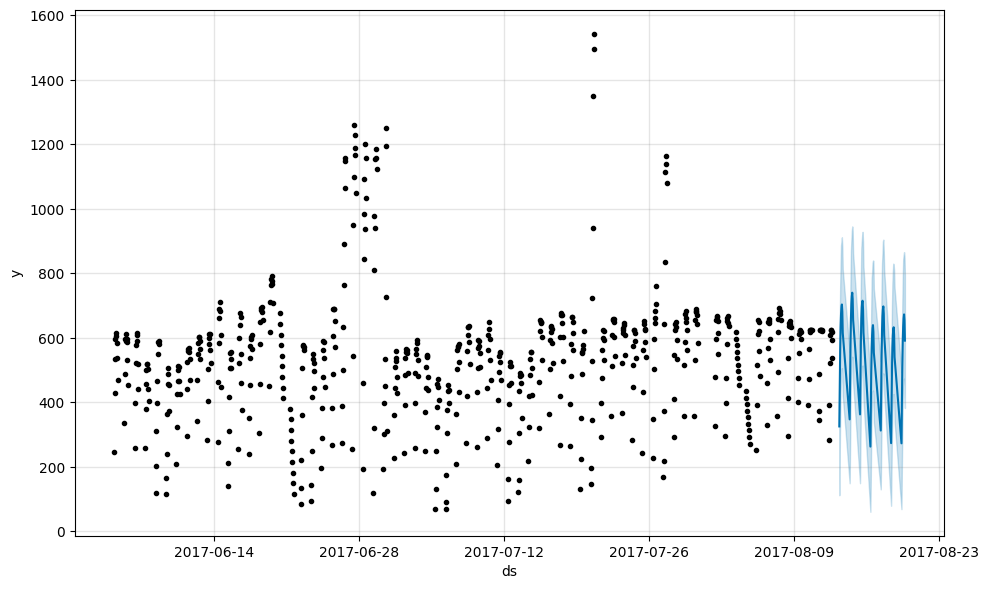

In [127]:
model.plot(forecast_test_2w_prop);
# model.plot_components(forecast_pred_prop);

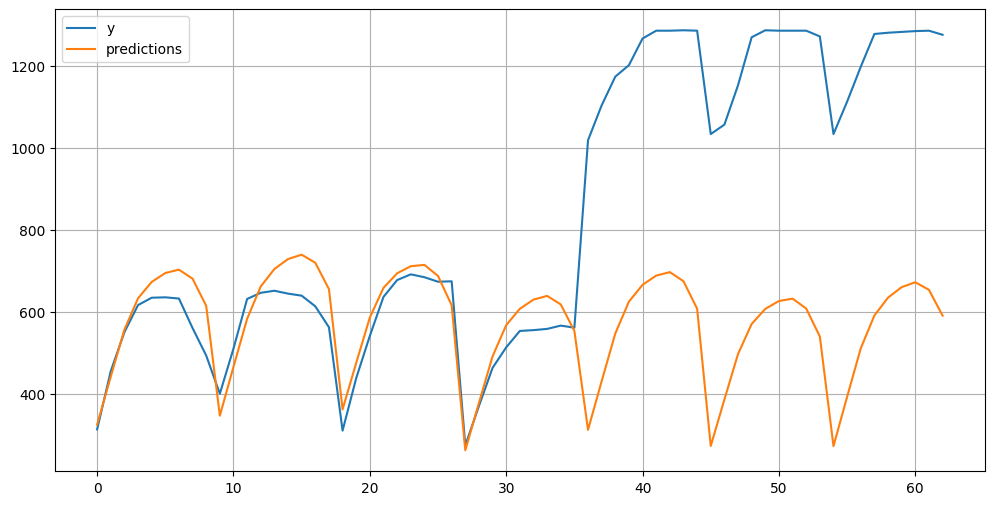

In [128]:
df_0_test_2w_prop.plot(y=['y','predictions'],figsize=(12,6),grid=True);

In [129]:
eval_metrics(df_0_test_2w_prop['y'] , df_0_test_2w_prop['predictions'] )


mae: 311.30338420726645 
rmse: 437.15339371161565 
mse: 191103.08963358283


In [130]:
# Done

## 3) LSTM

### Data Preparation

In [131]:
df_0_train_lstm = df_0_train.copy()
df_0_test_lstm = df_0_test.copy()
df_0_test_1w_lstm = df_0_test_1w.copy()
df_0_test_2w_lstm = df_0_test_2w.copy()

### Import Required Libraries For LSTM

In [132]:
# import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM , Bidirectional , Dropout , BatchNormalization , Reshape
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam

In [133]:
# set random seed for tensorflow
tf.random.set_seed(0)

### Train | Test Split

In [134]:
##### ALREADY DONE #####

In [135]:
# test_size = 135

In [136]:
# test_ind = len(df_0_all_train) - test_size

In [137]:
# df_0_train_lstm = df_0_all_train.iloc[:test_ind]
# df_0_test_lstm = df_0_all_train.iloc[test_ind:]

### Scaling

In [138]:
scaler = MinMaxScaler()

In [139]:
df_0_train_lstm_scaled = scaler.fit_transform(df_0_train_lstm)
df_0_test_lstm_scaled = scaler.transform(df_0_test_lstm)
df_0_test_1w_lstm_scaled = scaler.transform(df_0_test_1w_lstm)
df_0_test_2w_lstm_scaled = scaler.transform(df_0_test_2w_lstm)

### Time Series Generator

In [140]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [141]:
length = 9  # sequences = (data_size - length) / batch_size + 1 
batch_size = 1
df_0_train_lstm_generator = TimeseriesGenerator(df_0_train_lstm_scaled, df_0_train_lstm_scaled, length = length, batch_size = batch_size)
df_0_test_lstm_generator = TimeseriesGenerator(df_0_test_lstm_scaled, df_0_test_lstm_scaled, length = length, batch_size = batch_size)
df_0_test_1w_lstm_generator = TimeseriesGenerator(df_0_test_1w_lstm_scaled, df_0_test_1w_lstm_scaled, length = length, batch_size = batch_size)
df_0_test_2w_lstm_generator = TimeseriesGenerator(df_0_test_2w_lstm_scaled, df_0_test_2w_lstm_scaled, length = length, batch_size = batch_size)

In [ ]:
# # For GridSearch

# X_train, y_train = [], []
# for i in range(len(train_generator)):
#     X, y = train_generator[i]
#     X_train.append(X)
#     y_train.append(y)
# X_train, y_train = np.concatenate(X_train), np.concatenate(y_train)

In [142]:
df_0_train_lstm_generator[0]

(array([[[0.12016293],
         [0.2437203 ],
         [0.31500339],
         [0.35777325],
         [0.36931432],
         [0.36320434],
         [0.34962661],
         [0.31771894],
         [0.27155465]]]),
 array([[0.17990496]]))

In [143]:
X, y = df_0_train_lstm_generator[0]

In [144]:
X.shape

(1, 9, 1)

In [145]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.12016293 0.2437203  0.31500339 0.35777325 0.36931432 0.36320434
 0.34962661 0.31771894 0.27155465]
Predict this y: 
 [[0.17990496]]


### Building the LSTM

In [147]:
n_features = df_0_train_lstm_scaled.shape[1]

In [148]:
model = Sequential()

model.add(LSTM(16, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))

model.add(LSTM(12, activation = 'relu', return_sequences=False))


model.add(Dense(1))


opt = Adam(learning_rate=0.001)
model.compile(optimizer = opt , loss = 'mse')

In [ ]:
# model.fit(df_0_train_lstm_generator,
#         epochs = 50,
#         )


In [ ]:
# model.summary();

In [ ]:
# loss_df = pd.DataFrame(model.history.history)
# loss_df.plot();

### Predict the 1.Week of Test Data

In [149]:
model.load_weights("models\model_weights_1w_mae54.h5")

In [150]:
predictions_1w_scaled = []

first_eval_batch = df_0_test_1w_lstm_scaled[:length]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(df_0_test_1w_lstm_scaled.shape[0]):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_1w_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

1/1 [==============================] - 0s 42ms/step


### Inverse Transformation and Comparing

In [151]:
compare_1w = df_0_test_1w_lstm  
compare_1w['Prophet_Predictions'] = np.array(forecast_test_1w_prop.yhat)

predictions = scaler.inverse_transform(predictions_1w_scaled)
compare_1w['LSTM_Predictions_1w_Relu'] = predictions
compare_1w

,usage,Prophet_Predictions,LSTM_Predictions_1w_Relu
2017-08-06 08:00:00,329.0,315.314082,331.130051
2017-08-06 09:00:00,459.0,433.291467,450.910508
2017-08-06 10:00:00,569.0,548.741458,525.636924
2017-08-06 11:00:00,648.0,625.584944,570.448709
2017-08-06 12:00:00,653.0,666.516864,607.840715
...,...,...,...
2017-08-12 12:00:00,623.0,627.104823,562.040724
2017-08-12 13:00:00,624.0,655.759603,611.699509
2017-08-12 14:00:00,619.0,670.412036,640.368512
2017-08-12 15:00:00,594.0,651.465976,631.155993


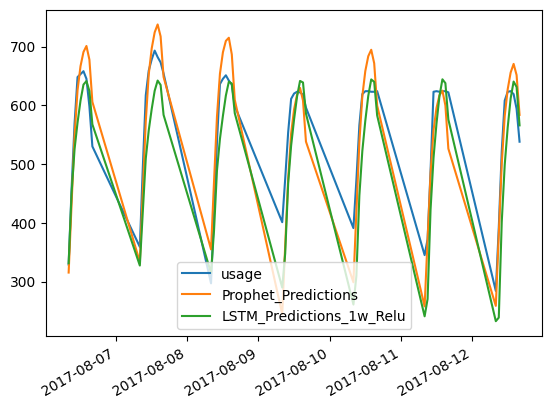

In [152]:
compare_1w.plot();

In [153]:
eval_metrics(compare_1w.usage, compare_1w.LSTM_Predictions_1w_Relu) # That's it !


mae: 54.940261963222696 
rmse: 68.9174439488959 
mse: 4749.614080449208


In [ ]:
# model.save_weights("models\model_weights_mae54.h5")

### Predict the 2.Week of Test Data

In [169]:
df_0_train1w_lstm = pd.concat([df_0_train_lstm , df_0_test_1w_lstm.drop(['Prophet_Predictions','LSTM_Predictions_1w_Relu'] , axis = 1) ] , axis = 0)
df_0_train1w_lstm

,usage
2017-06-04 08:00:00,247.0
2017-06-04 09:00:00,429.0
2017-06-04 10:00:00,534.0
2017-06-04 11:00:00,597.0
2017-06-04 12:00:00,614.0
...,...
2017-08-12 12:00:00,623.0
2017-08-12 13:00:00,624.0
2017-08-12 14:00:00,619.0
2017-08-12 15:00:00,594.0


In [170]:
scaler_new = MinMaxScaler()

In [178]:
df_0_test_2w_lstm = df_0_test_2w_lstm.drop(['Prophet_Predictions' , 'LSTM_Predictions_2w_Relu'] , axis=1)

In [179]:
df_0_train1w_lstm_scaled = scaler_new.fit_transform(df_0_train1w_lstm)
df_0_test_2w_lstm_scaled = scaler_new.transform(df_0_test_2w_lstm)

In [181]:
df_0_train1w_lstm_generator = TimeseriesGenerator(df_0_train1w_lstm_scaled, df_0_train1w_lstm_scaled, length = length, batch_size = batch_size)
df_0_test_2w_lstm_generator = TimeseriesGenerator(df_0_test_2w_lstm_scaled, df_0_test_2w_lstm_scaled, length = length, batch_size = batch_size)

### Build a new LSTM

In [185]:
n_features = df_0_train1w_lstm_scaled.shape[1]

In [186]:
model = Sequential()

model.add(LSTM(16, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))

model.add(LSTM(12, activation = 'relu', return_sequences=False))


model.add(Dense(1))


opt = Adam(learning_rate=0.001)
model.compile(optimizer = opt , loss = 'mse')

In [187]:
model.fit(df_0_train1w_lstm_generator,
        epochs = 50,
        )

Epoch 1/50
612/612 [==============================] - 6s 6ms/step - loss: 0.0259
Epoch 2/50
612/612 [==============================] - 3s 5ms/step - loss: 0.0178
Epoch 3/50
612/612 [==============================] - 3s 5ms/step - loss: 0.0152
Epoch 4/50
612/612 [==============================] - 3s 5ms/step - loss: 0.0114
Epoch 5/50
612/612 [==============================] - 3s 5ms/step - loss: 0.0101
Epoch 6/50
612/612 [==============================] - 4s 6ms/step - loss: 0.0094
Epoch 7/50
612/612 [==============================] - 3s 4ms/step - loss: 0.0088
Epoch 8/50
612/612 [==============================] - 3s 5ms/step - loss: 0.0090
Epoch 9/50
612/612 [==============================] - 3s 5ms/step - loss: 0.0090
Epoch 10/50
612/612 [==============================] - 3s 5ms/step - loss: 0.0080
Epoch 11/50
612/612 [==============================] - 3s 5ms/step - loss: 0.0084
Epoch 12/50
612/612 [==============================] - 3s 4ms/step - loss: 0.0085
Epoch 13/50
612/612 [====

In [188]:
model.summary();

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 9, 16)             1152      
                                                                 
 lstm_3 (LSTM)               (None, 12)                1392      
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 2,557
Trainable params: 2,557
Non-trainable params: 0
_________________________________________________________________


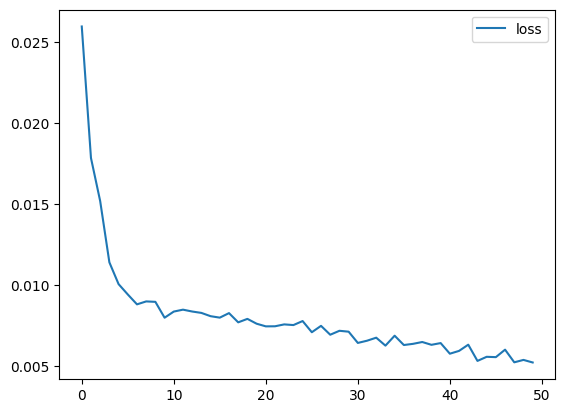

In [189]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [190]:
# model = model.load_weights("models\model_weights_mae54.h5")

### Predicts the 2.Week of Test Data

In [191]:
predictions_2w_scaled = []

first_eval_batch = df_0_test_2w_lstm_scaled[:length]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(df_0_test_2w_lstm_scaled.shape[0]):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_2w_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

1/1 [==============================] - 0s 27ms/step


### Inverse Transformation and Comparing

In [ ]:
# I will look this last part.

In [192]:
compare_2w = df_0_test_2w_lstm  
compare_2w['Prophet_Predictions'] = np.array(forecast_test_2w_prop.yhat)

predictions = scaler.inverse_transform(predictions_1w_scaled)
compare_2w['LSTM_Predictions_2w_Relu'] = predictions
compare_2w

,usage,Prophet_Predictions,LSTM_Predictions_2w_Relu
2017-08-13 08:00:00,314.0,325.580545,331.130051
2017-08-13 09:00:00,456.0,442.534394,450.910508
2017-08-13 10:00:00,551.0,557.119276,525.636924
2017-08-13 11:00:00,617.0,633.556075,570.448709
2017-08-13 12:00:00,635.0,673.409152,607.840715
...,...,...,...
2017-08-19 12:00:00,1281.0,635.247210,562.040724
2017-08-19 13:00:00,1283.0,660.814230,611.699509
2017-08-19 14:00:00,1285.0,672.716909,640.368512
2017-08-19 15:00:00,1286.0,654.252308,631.155993


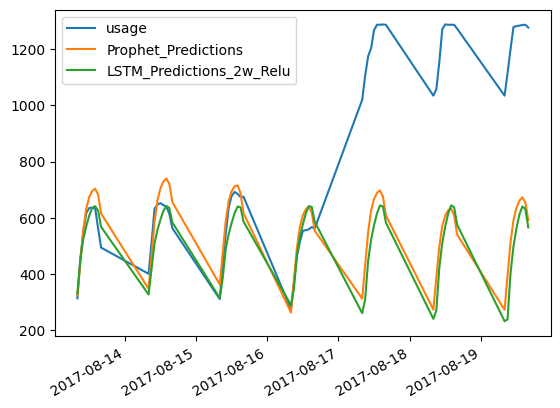

In [193]:
compare_2w.plot();

In [157]:
eval_metrics(compare_2w.usage, compare_2w.LSTM_Predictions_2w_Relu) # That's it !


mae: 334.00909894361854 
rmse: 474.2725936715277 
mse: 224934.49310791804


In [194]:
eval_metrics(compare_2w.usage, compare_2w.LSTM_Predictions_2w_Relu) # That's it !


mae: 334.00909894361854 
rmse: 474.2725936715277 
mse: 224934.49310791804


In [ ]:
# model.save_weights("models\model_weights_mae54.h5")

In [ ]:
# Done

# Final Models